# Notebook for Project


In [15]:
import pandas as pd

df= pd.read_csv('data/Mall_Customers.csv')
df_clean = df.drop(columns=["CustomerID"])
df_clean["Gender"] = df_clean["Gender"].map({"Male":0 , "Female":1})

In [5]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [16]:
df_clean.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


<Axes: >

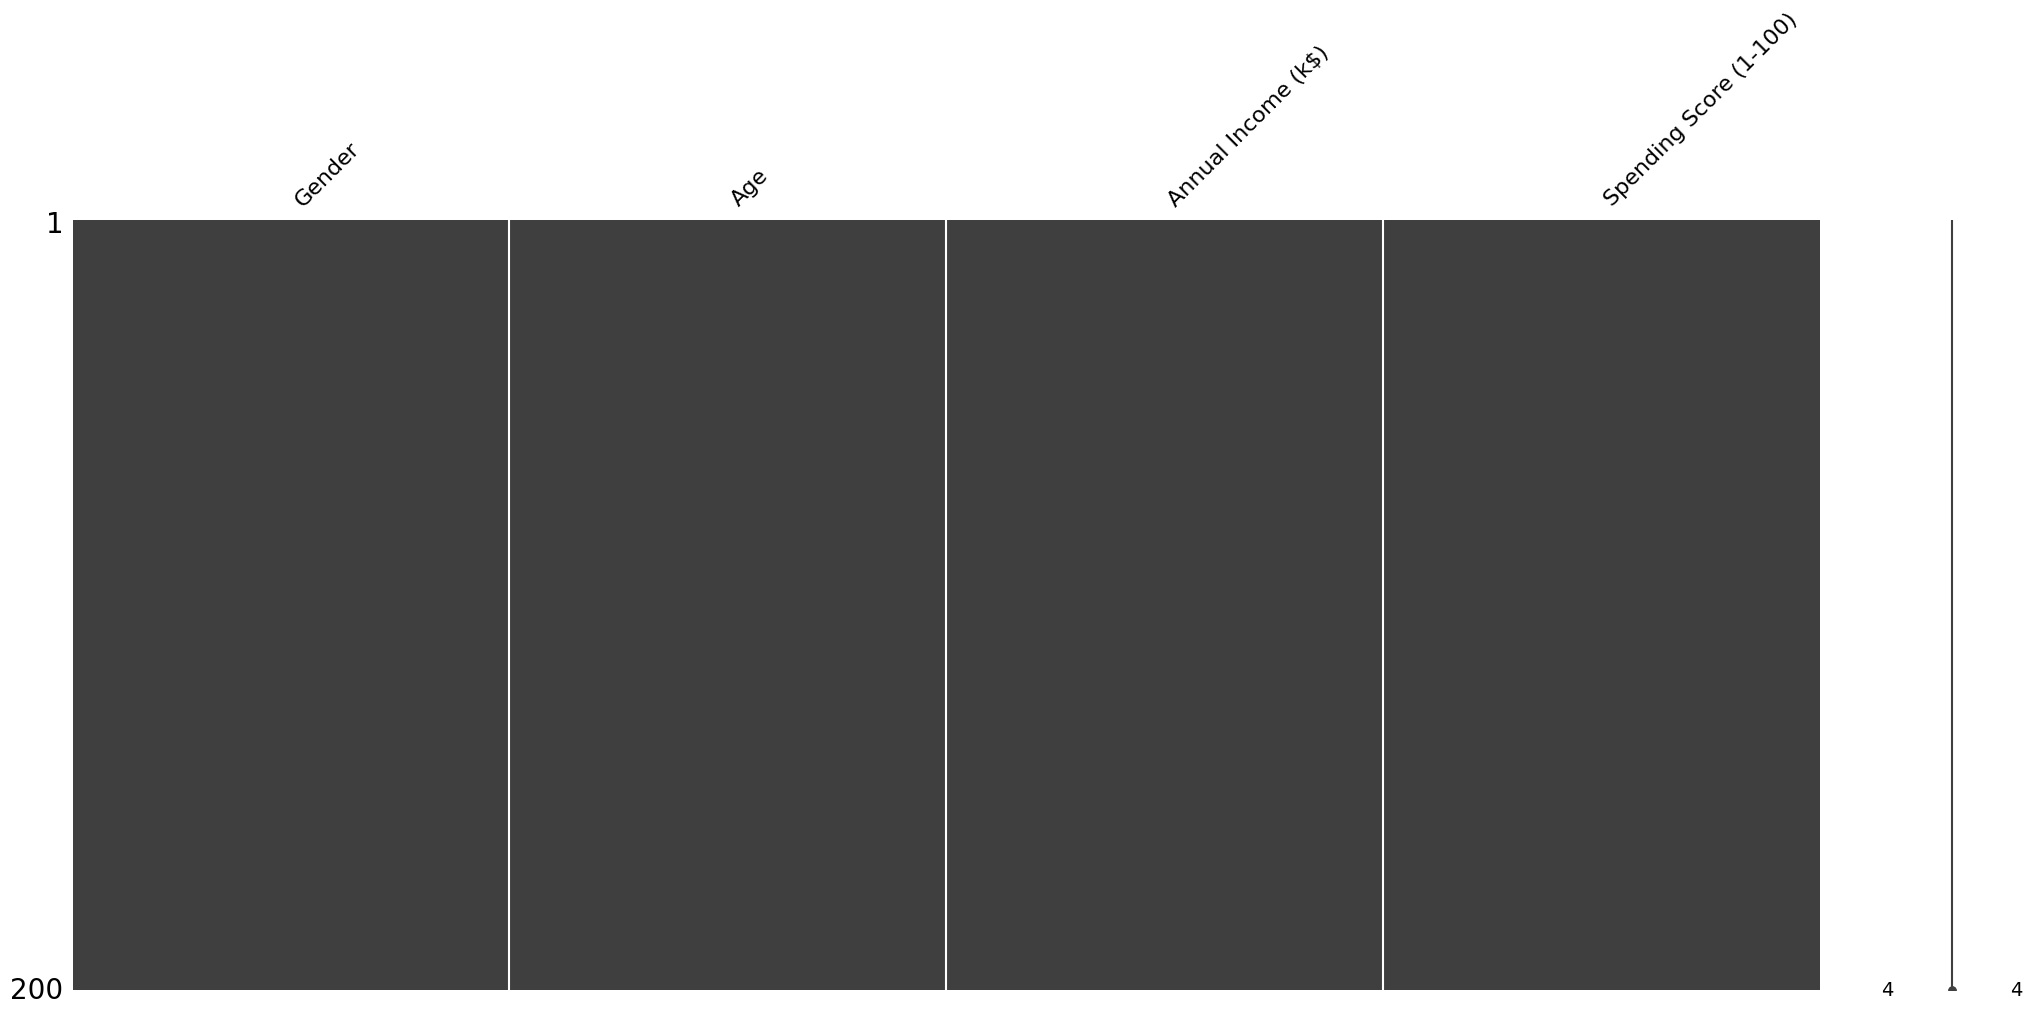

In [7]:
import missingno as msno
msno.matrix(df_clean)

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

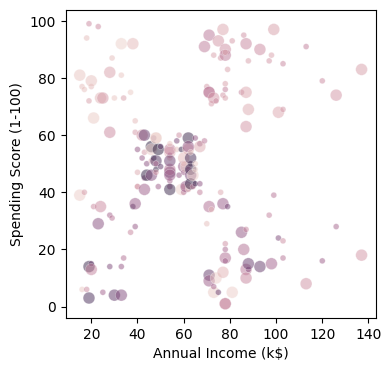

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(4,4))
sns.scatterplot(data=df_clean, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Age", size="Gender", alpha=0.5, legend=False)

In [ ]:
cat = list(df_clean.columns)
cat

In [17]:
df_clean.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [60]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = df_clean

NBClust = 5
# kmeansclust with K=2
kmeansclust = KMeans(n_clusters=NBClust)
# fit the model
kmeansclust.fit_predict(X)
# distance from samples to cluster
dist = kmeansclust.transform(X)
# get the label
label = kmeansclust.labels_
# get the centroids
C = kmeansclust.cluster_centers_



<Axes: xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

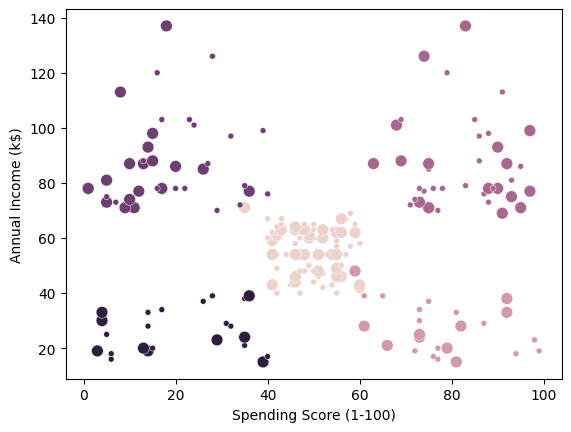

In [61]:
sns.scatterplot(data=df_clean, y="Annual Income (k$)", x="Spending Score (1-100)", hue=label, size="Gender", alpha=1, legend=False)


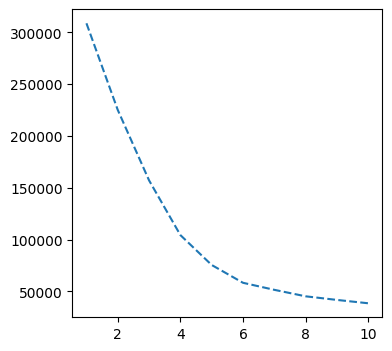

In [55]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = df_clean
K_list = [1,2,3,4,5,6,7,8,9,10]
dist_list = []
for k in K_list:
    kmeansclust = KMeans(n_clusters=k)
    kmeansclust.fit_predict(X)
    dist = kmeansclust.inertia_
    dist_list.append(dist)

plt.figure(figsize=(4,4))
plt.plot(K_list, dist_list, linestyle='--')
plt.show()
    